In [1]:
# import Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train= pd.read_csv(os.path.join('src', 'data','train.csv'))
test= pd.read_csv(os.path.join('src', 'data','test.csv'))

## Exploratory Data Analysis
### Domain knowledge is so important to figure out the solution...
### 1. Featuring Engineering from Domain Knowledge
Static and Dynamic Activities

In static activities (sit, stand, lie down) motion information will not be very useful.
In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

### 2. check out mean of accelormeter

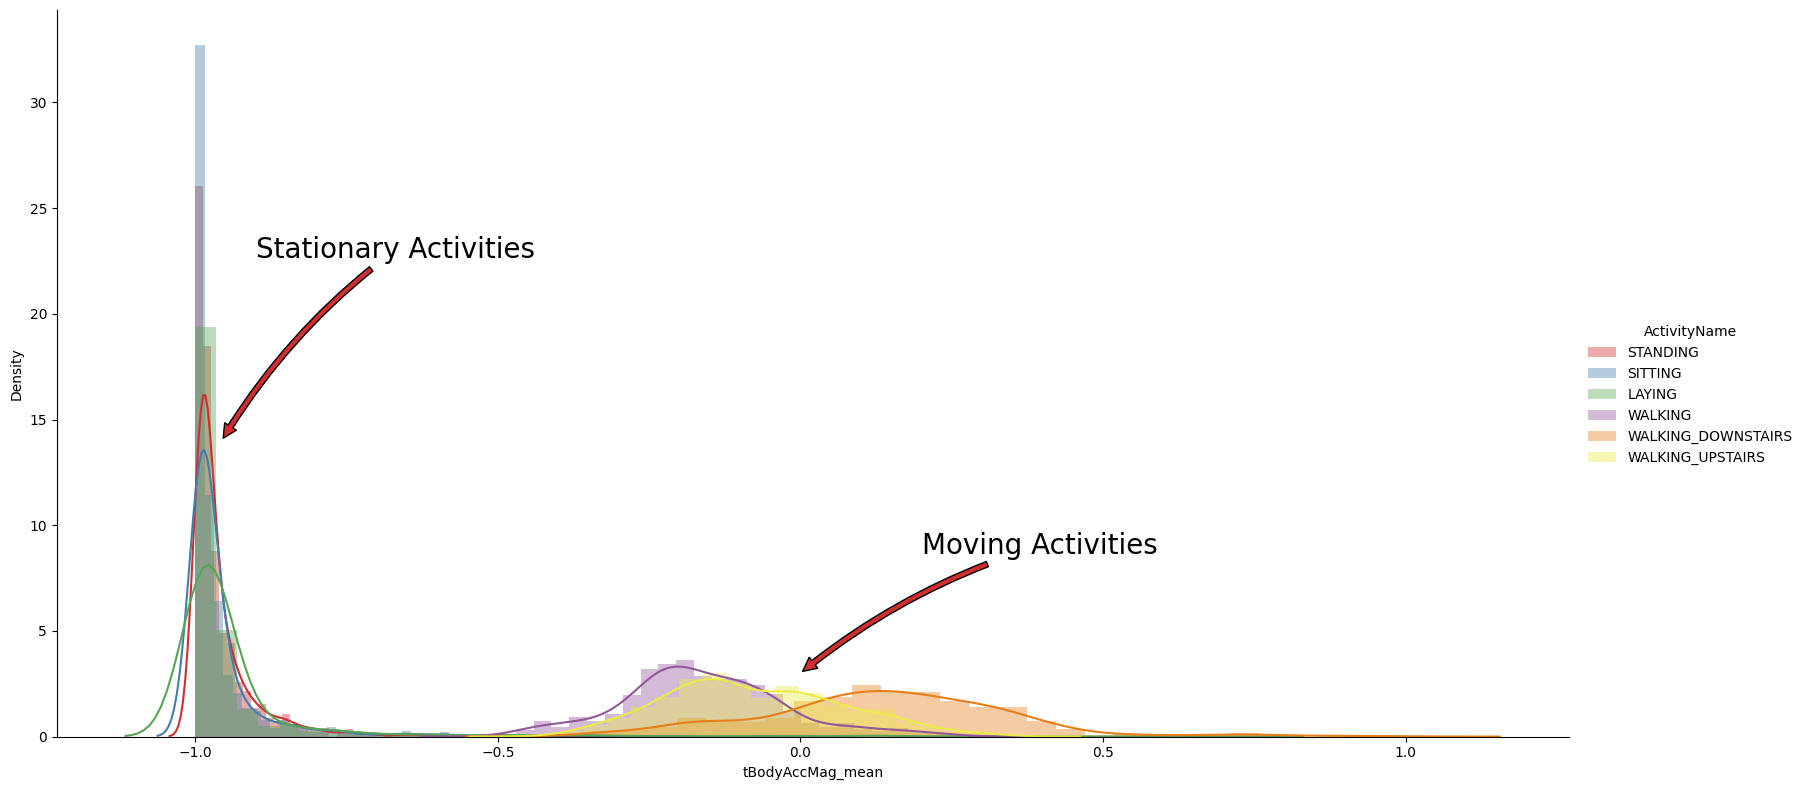

In [8]:
# sns.displot: 여러개 그룹의 커널 밀도 곡선 그리기
sns.set_palette("Set1", desat=0.80) #plot을 그리기 전에 변수로 저장
facetgrid= sns.FacetGrid(train, hue='ActivityName', height=8, aspect=2) #FacetGrid(): density를 확인하는 플롯
facetgrid.map(sns.distplot,'tBodyAccMag_mean', hist=True).add_legend() ## distplot(): plotting distribution
plt.annotate("Stationary Activities", xy=(-0.956,14), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()
plt.show()

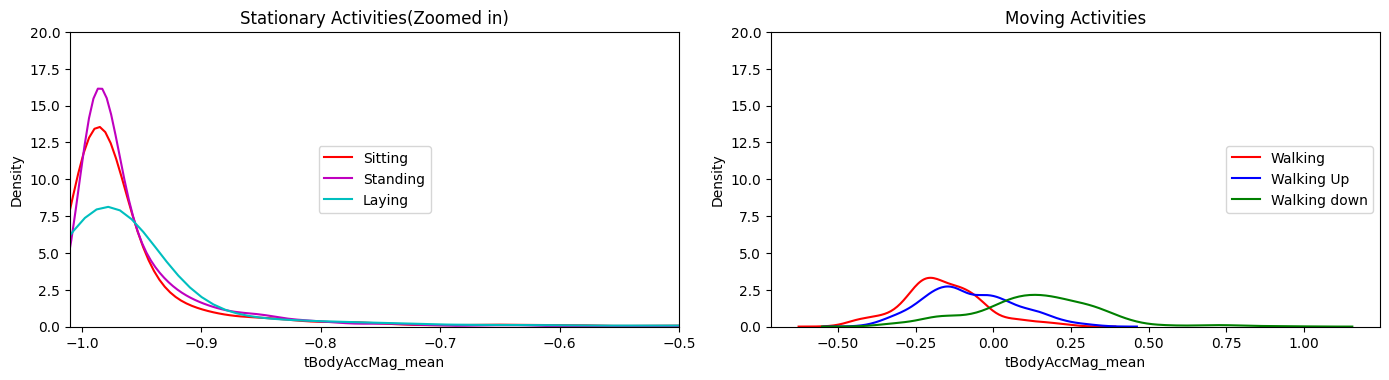

In [9]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity'] == 1]
df2 = train[train['Activity'] == 2]
df3 = train[train['Activity'] == 3]
df4 = train[train['Activity'] == 4]
df5 = train[train['Activity'] == 5]
df6 = train[train['Activity'] == 6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMag_mean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMag_mean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMag_mean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.ylim(0, 20)
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMag_mean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMag_mean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMag_mean'],color = 'green',hist = False, label = 'Walking down')
plt.ylim(0, 20)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

### 3. magnitude of accelormeter can distinguish...

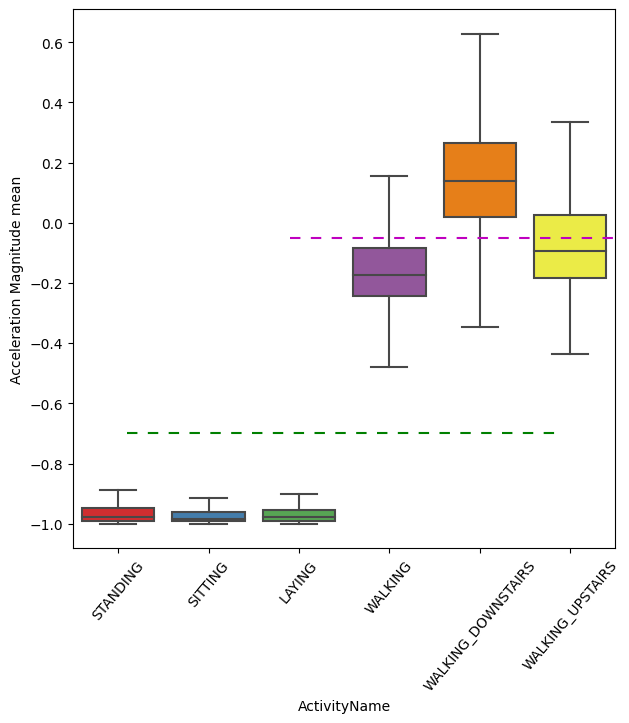

In [10]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMag_mean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=50)
plt.show()

### Observations:

If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.

If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.

If tAccMean > 0.0 then the Activity is WalkingDownstairs.

We can classify 75% the Acitivity labels with some errors.

### 4. check out Gravity AccelerationComponants

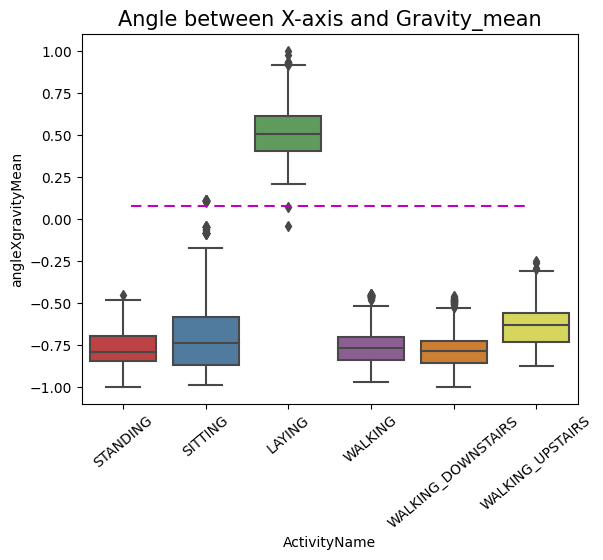

In [11]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

### Observations:

If angleX,gravityMean > 0 then Activity is Laying.

### We can classify all datapoints belonging to Laying activity with just a single if else statement.

## Apply t-sne on the data in order to check out the distribution

In [12]:
from sklearn.manifold import TSNE

In [13]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index, perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity= perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x' : X_reduced[:,0], 'y' : X_reduced[:,1] ,'label' : y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data= df, x= 'x', y= 'y', hue= 'label', fit_reg= False, height= 8,\
                   palette= "Set1",markers= ['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(os.path.join(os.getcwd(), 'src', 'image', img_name))
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.026s...
[t-SNE] Computed neighbors for 7352 samples in 0.967s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597464
[t-SNE] Computed conditional probabilities in 0.032s
[t-SNE] Iteration 50: error = 124.7467270, gradient norm = 0.0285026 (50 iterations in 1.885s)
[t-SNE] Iteration 100: error = 107.0844193, gradient norm = 0.0321512 (50 iterations in 

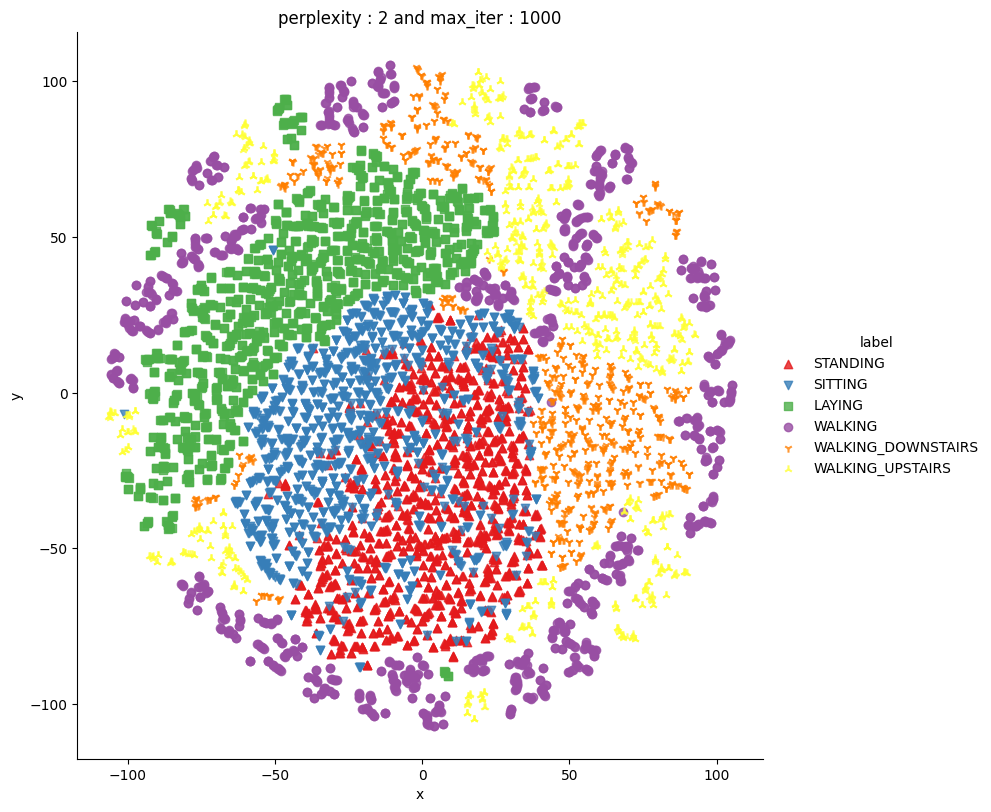

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.033s...
[t-SNE] Computed neighbors for 7352 samples in 0.916s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 114.1427383, gradient norm = 0.0172405 (50 iterations in 2.256s)
[t-SNE] Iteration 100: error = 97.5773392, gradient norm = 0.0153093 (50 iteration

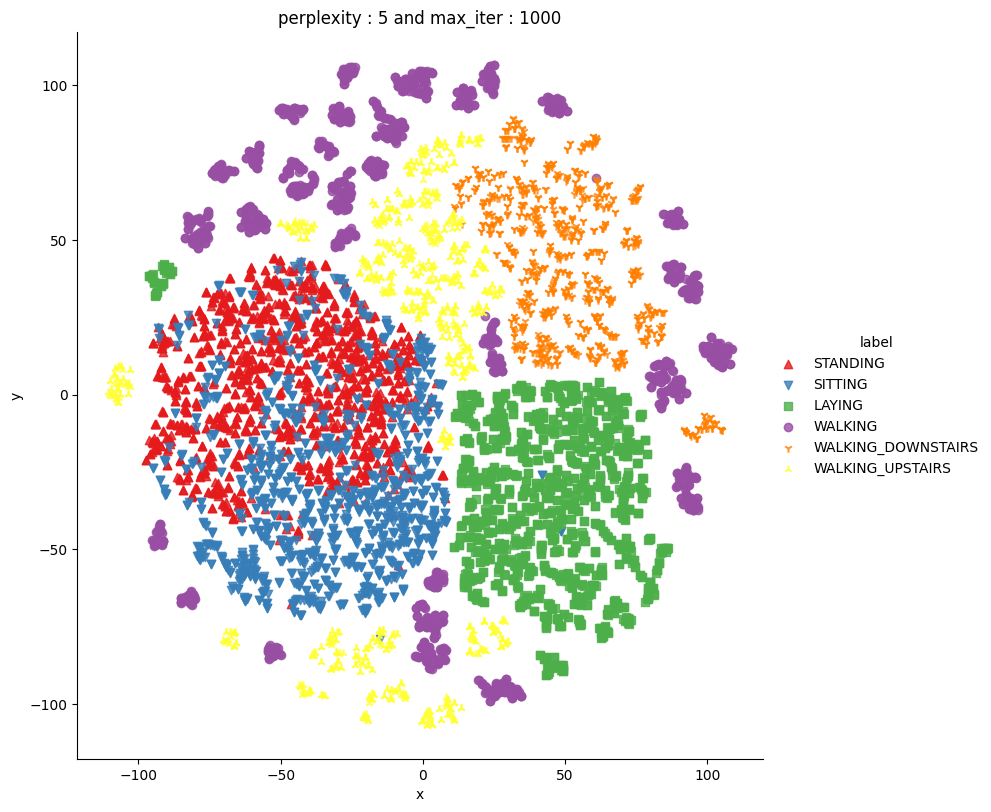

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.037s...
[t-SNE] Computed neighbors for 7352 samples in 1.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.118s
[t-SNE] Iteration 50: error = 105.5895386, gradient norm = 0.0240856 (50 iterations in 2.300s)
[t-SNE] Iteration 100: error = 90.1988373, gradient norm = 0.0094392 (50 iteratio

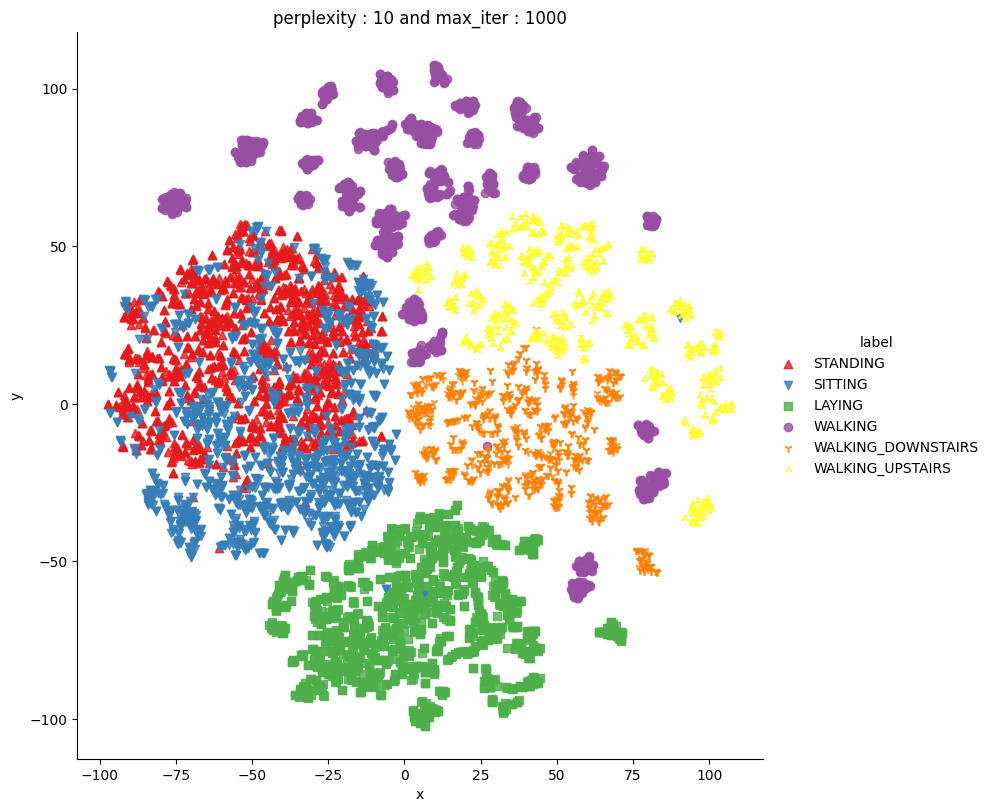

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.023s...
[t-SNE] Computed neighbors for 7352 samples in 1.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.237s
[t-SNE] Iteration 50: error = 97.2494431, gradient norm = 0.0213713 (50 iterations in 2.480s)
[t-SNE] Iteration 100: error = 83.9166794, gradient norm = 0.0061461 (50 iteration

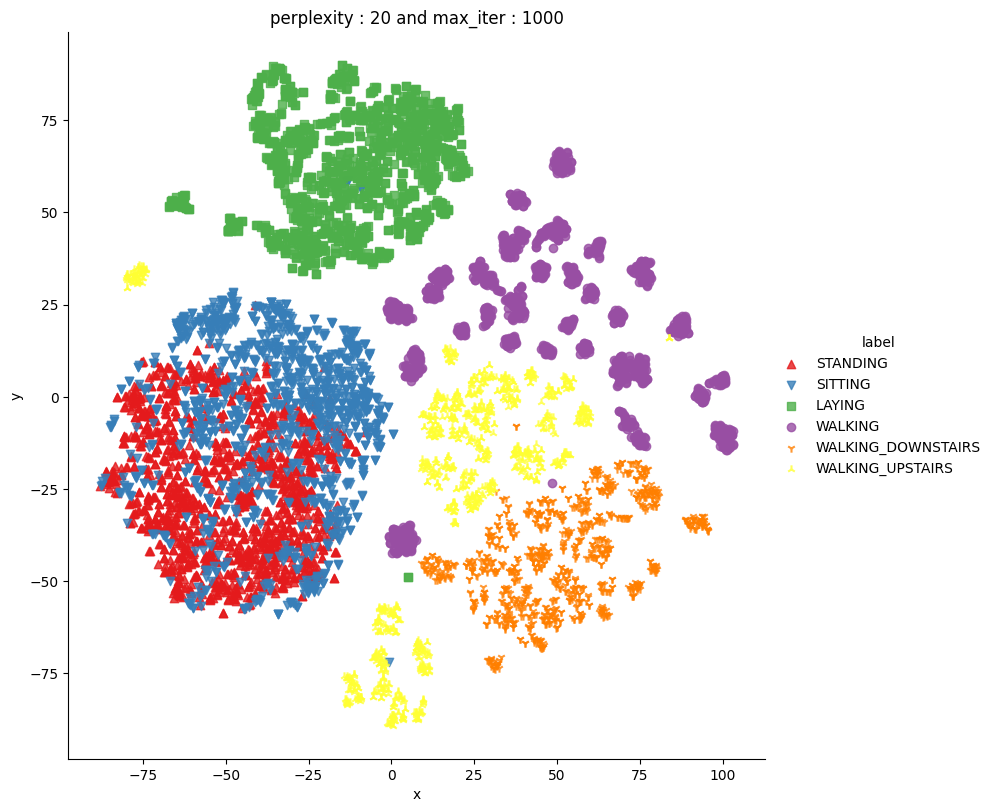

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.025s...
[t-SNE] Computed neighbors for 7352 samples in 1.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.453s
[t-SNE] Iteration 50: error = 85.9605637, gradient norm = 0.0237743 (50 iterations in 3.286s)
[t-SNE] Iteration 100: error = 75.7336655, gradient norm = 0.0049290 (50 iteratio

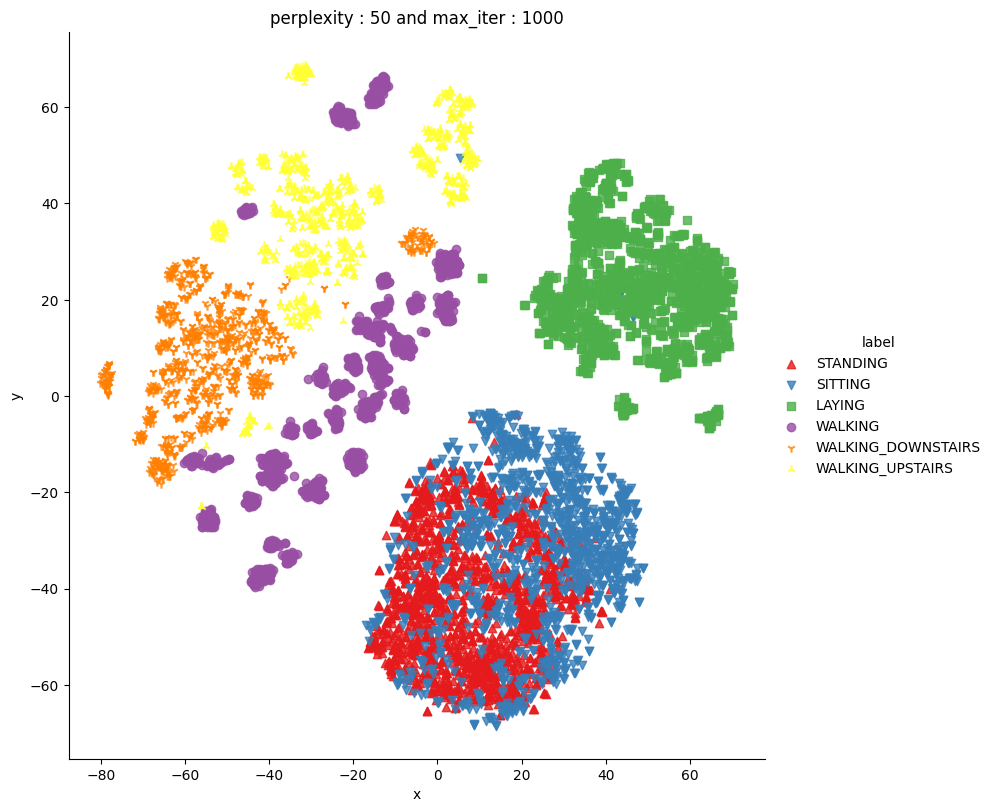

Done


In [14]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])